In [1]:
import pandas as pd
from CalculatedFieldSubroutines import BinaryDrivingMode
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
import CalculatedFieldSubroutines as cfs
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
new_list= ('51ef6da6-ca9f-11ee-909c-e1dc60cf66f9',
'd12cd1c4-caec-11ee-909c-e1dc60cf66f9',
'6d2ea45a-c839-11ee-a7fc-dd032dba19e8',
'c9c6856c-d33c-11ee-b437-336917683bb8',
'7fb7b9c0-c881-11ee-a7fc-dd032dba19e8',
'8437f77a-cab7-11ee-909c-e1dc60cf66f9',
'c338788a-d324-11ee-b437-336917683bb8',
'853ef120-cad3-11ee-909c-e1dc60cf66f9',
'8fa6fe80-c869-11ee-a7fc-dd032dba19e8') 

In [3]:
final_df = pd.DataFrame()

In [4]:
for gmID in new_list:
    gmID_best_pose_df = cfs.retrieve_gmID_topic( gmID, '/apollo/sensor/gnss/best/pose' )
    gmID_chassis_df = cfs.retrieve_gmID_topic( gmID, '/apollo/canbus/chassis')
    gmID_chassis_df = gmID_chassis_df.sort_values("time")
    gmID_best_pose_df = gmID_best_pose_df.sort_values("time")

    cfs.BinaryDrivingMode(gmID_chassis_df)
    cfs.TernaryDrivingModeTransition(gmID_chassis_df)
    cfs.LatLonTotalStdDev(gmID_best_pose_df)
    
    cfs.ChassisBestPoseMatchedTime(gmID_chassis_df, gmID_best_pose_df)
    merged_df = pd.merge(gmID_chassis_df, gmID_best_pose_df, on='ChassisBestPoseMatchedTime')
    final_df = pd.concat([final_df,merged_df])

    



/home/lwedraogo_linux/Desktop/TDMprivate/data/51ef6da6-ca9f-11ee-909c-e1dc60cf66f9/_apollo_sensor_gnss_best_pose/51ef6da6-ca9f-11ee-909c-e1dc60cf66f9_apollo_sensor_gnss_best_pose.csv
/home/lwedraogo_linux/Desktop/TDMprivate/data/51ef6da6-ca9f-11ee-909c-e1dc60cf66f9/_apollo_canbus_chassis/51ef6da6-ca9f-11ee-909c-e1dc60cf66f9_apollo_canbus_chassis.csv
/home/lwedraogo_linux/Desktop/TDMprivate/data/d12cd1c4-caec-11ee-909c-e1dc60cf66f9/_apollo_sensor_gnss_best_pose/d12cd1c4-caec-11ee-909c-e1dc60cf66f9_apollo_sensor_gnss_best_pose.csv
/home/lwedraogo_linux/Desktop/TDMprivate/data/d12cd1c4-caec-11ee-909c-e1dc60cf66f9/_apollo_canbus_chassis/d12cd1c4-caec-11ee-909c-e1dc60cf66f9_apollo_canbus_chassis.csv
/home/lwedraogo_linux/Desktop/TDMprivate/data/6d2ea45a-c839-11ee-a7fc-dd032dba19e8/_apollo_sensor_gnss_best_pose/6d2ea45a-c839-11ee-a7fc-dd032dba19e8_apollo_sensor_gnss_best_pose.csv
/home/lwedraogo_linux/Desktop/TDMprivate/data/6d2ea45a-c839-11ee-a7fc-dd032dba19e8/_apollo_canbus_chassis/6d2ea45

In [5]:
for c in final_df.columns:
    print(c)

brakePercentage
groupMetadataID_x
drivingMode
speedMps
time_x
throttlePercentage
steeringPercentage
signal.turnSignal
BinaryDrivingMode
TernaryDrivingModeTransition
ChassisBestPoseMatchedTime
heightMsl
groupMetadataID_y
latitudeStdDev
longitude
solType
extendedSolutionStatus
time_y
heightStdDev
solStatus
latitude
longitudeStdDev
numSatsInSolution
LatLonTotalStdDev


In [6]:
# Using`final_df` 
X = final_df[['brakePercentage', 'throttlePercentage', 'steeringPercentage', 'speedMps','LatLonTotalStdDev']]  # Continuous features only
y = final_df['BinaryDrivingMode']  

# Standardize the continuous variables to ensure consistent scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model (k=5 as an example)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model using accuracy and classification report
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9889
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     29798
           1       0.99      0.99      0.99    142696

    accuracy                           0.99    172494
   macro avg       0.98      0.98      0.98    172494
weighted avg       0.99      0.99      0.99    172494



In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 28801    997]
 [   913 141783]]


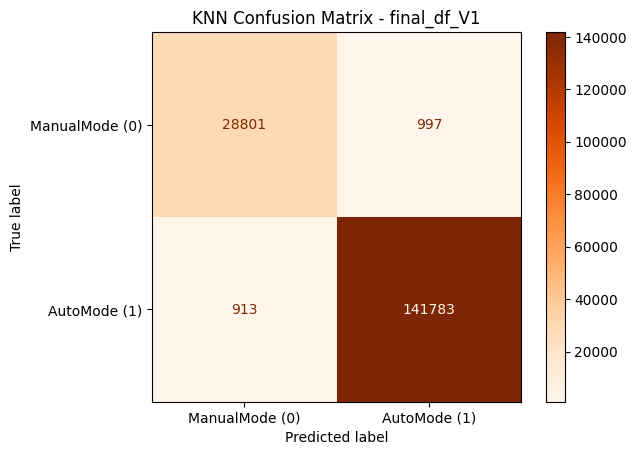

In [8]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ['ManualMode (0)', 'AutoMode (1)']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix with a title
disp.plot(cmap=plt.cm.Oranges)
plt.title("KNN Confusion Matrix - final_df_V1")
plt.show()

In [9]:

# Specify train and test identifiers
new_list_train = (
    '51ef6da6-ca9f-11ee-909c-e1dc60cf66f9',
'd12cd1c4-caec-11ee-909c-e1dc60cf66f9',
'6d2ea45a-c839-11ee-a7fc-dd032dba19e8',
'c9c6856c-d33c-11ee-b437-336917683bb8',
'7fb7b9c0-c881-11ee-a7fc-dd032dba19e8',
'8437f77a-cab7-11ee-909c-e1dc60cf66f9'
)

new_list_test = (
    'c338788a-d324-11ee-b437-336917683bb8',
'853ef120-cad3-11ee-909c-e1dc60cf66f9',
'8fa6fe80-c869-11ee-a7fc-dd032dba19e8')


# Filter the dataframe into training and testing sets based on the identifiers
train_df = final_df[final_df['groupMetadataID_x'].isin(new_list_train)]  
test_df = final_df[final_df['groupMetadataID_x'].isin(new_list_test)]   

# Separate features (X) and target (y) for both training and testing sets
X_train = train_df[['brakePercentage', 'throttlePercentage', 'steeringPercentage', 'speedMps', 'LatLonTotalStdDev']]
y_train = train_df['BinaryDrivingMode']  # Replace with your target column name

X_test = test_df[['brakePercentage', 'throttlePercentage', 'steeringPercentage', 'speedMps', 'LatLonTotalStdDev']]
y_test = test_df['BinaryDrivingMode']  

# Standardize the continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8886
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.53      0.50     32059
           1       0.94      0.93      0.94    265818

    accuracy                           0.89    297877
   macro avg       0.71      0.73      0.72    297877
weighted avg       0.89      0.89      0.89    297877



In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 16843  15216]
 [ 17975 247843]]


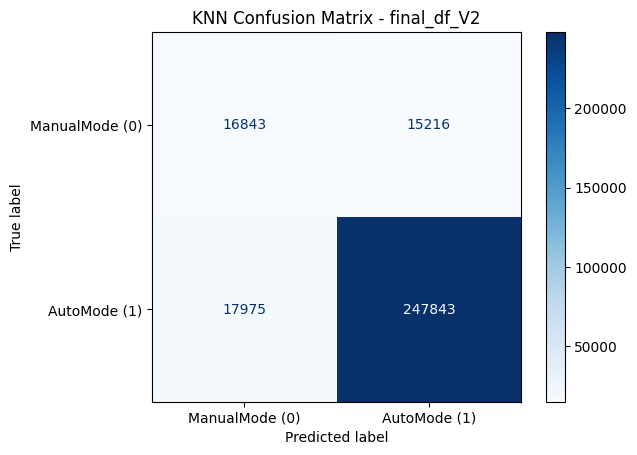

In [11]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ['ManualMode (0)', 'AutoMode (1)']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix with a title
disp.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix - final_df_V2")
plt.show()

In [12]:
print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}')

Balanced accuracy: 0.7289


In [13]:
pwd

'/home/lwedraogo_linux/Desktop/TDMprivate/code'